<a href="https://colab.research.google.com/github/divyakedia/Rented-Bike-Demand-Prediction-Seoul-/blob/main/Bike_Prediction_Demand_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**   Divya Kedia
##### **Team Member 2 -**   Sakshi Ghugare


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Regression Capstone Project/SeoulBikeData.csv',encoding = "ISO-8859-1")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

This dataset contains no null or missing values.

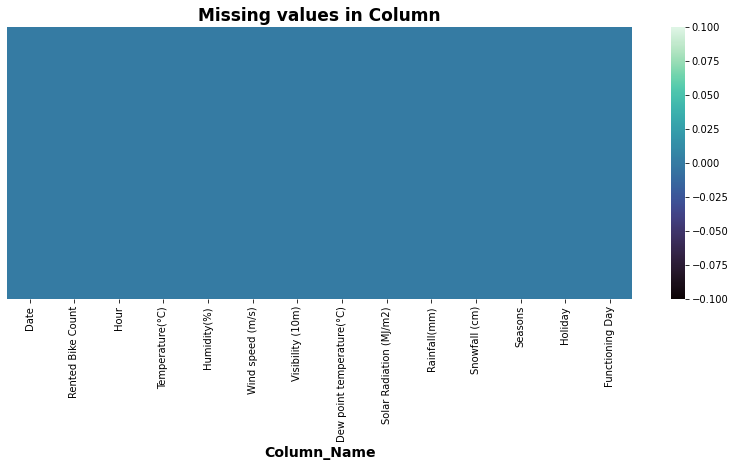

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(),  cmap="mako", yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Missing values in Column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

The dataset given is the dataset of the Bike data from the city Seoul in South Korea and using this data we have to analyse the bike demand and the insights behind it. This bike sharing Demand prediction is the analytical study so as to make the rental bike available and accessible to the public at the right time hence reducing the waiting period.

The given dataset has 8760 rows and 14 columns. There are no null/missing value as well as duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

## **Data Fields:**

1. Date : year-month-day

2. Rented Bike count - Count of bikes rented at each hour

3. Hour - Hour of the day

4. Temperature-Temperature in Celsius

5. Humidity - %

6. Windspeed - m/s

7. Visibility - 10m

8. Dew point temperature - Celsius

9. Solar radiation - MJ/m2

10. Rainfall - mm

11. Snowfall - cm

12. Seasons - Winter, Spring, Summer, Autumn

13. Holiday - Holiday/No holiday

14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Since the variables having units with name, renaming columns for better variable analysis.

df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                   'Temperature(°C)':'Temperature',
                   'Humidity(%)':'Humidity',
                   'Wind speed (m/s)':'Wind_speed',
                   'Visibility (10m)':'Visibility',
                   'Dew point temperature(°C)':'Dew_point_temperature', 
                   'Solar Radiation (MJ/m2)':'Solar_Radiation',
                   'Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall',
                   'Functioning Day':'Functioning_Day'},
          inplace=True)


In [ ]:
# # Change The datatype of Date column to extract "Day ", "Month", "Year".So  further we can analyze the Bike rentals with respect to Day, Month and year respectively.
df['Date']=df['Date'].astype('datetime64[ns]')


In [ ]:
# Breaking down the "Date" column into 3 new columns "Day", "Month", "year".
df['Day']=df['Date'].dt.day_name()   
df['Month']=df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [ ]:
#creating a new column of "week" and drop the column "Date","Day","year"
df['week']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','Day','year'],axis=1)

In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [ ]:
# checking value count of week
df['week'].value_counts()

0    6216
1    2544
Name: week, dtype: int64

In [ ]:
# Checking the timeshift of the bike rented during the day. Ex : day,night or evening.
df['timeshift'] = df['Hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,week,timeshift
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,night


In [ ]:
# Checking the count of values of Day, night and evening.
df['timeshift'].value_counts()

day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  week                   8760 non-null   int64  
 15  time

In the above table it is shown that "Hour", "Month" And "Week" are integer datatype but actually they are categorical datatype. so as to avoid the problem and confusion it is advisable to change the datatype of the mentioned columns.

In [ ]:
#Change the int64 column into catagory column
colm=['Hour','Month','week']
for col in colm:
  df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  week                   8760 non-null   c

In [ ]:
# checking the columns of the given dataset.
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'week',
       'timeshift'],
      dtype='object')

In [ ]:
df["week"].unique()

[0, 1]
Categories (2, int64): [0, 1]

### What all manipulations have you done and insights you found?

So as to get the clear idea about the data we have done a few manipulations. First we broke the Date column and split the column into 3 categories that is Day, Month, and year. Also we created a new column of week from the day and divided it into binary classification as 0 for weekdays and 1 for weekends.
Also we dropped the columns which were not signuficant for further usage.
We have also changed the datatype of certain columns to avoid further problem and confusion.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Before staring the visualization part let us divide the visualization in two different parts i.e 

1.   Categorical Variables.
2.   Numerical Variables.

Our Dependent Variable is "Rented bike Count" therefore, we will analyse this column with other independent columns using visualization so as to learn more about data.

Therefore lets first start with categorical variable followed by numerical variables.




## **Analysis of Categorical Variables**


What is categorical variables?

### **Categorical data is the statistical data type consisting of categorical variables or of data that has been converted into that form. These categories are based on qualitative characteristics.**

#### **Chart - 1  Pie Chart on Independent variable "Week" (Univariate)**

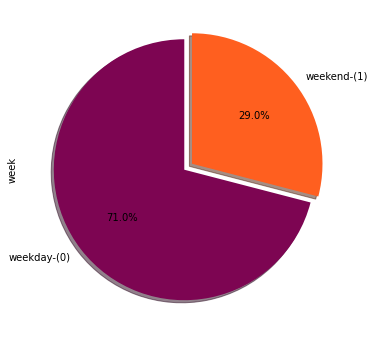

In [ ]:
# Chart - 1 visualization code
df['week'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['weekday-(0)','weekend-(1)'],
                               colors=['#7D0552','#FF5F1F'],
                               explode=[0,0.075]
                              )

##### 1. Why did you pick the specific chart?

 **A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.**

##### 2. What is/are the insight(s) found from the chart?

**As we can see from the above data that 71% demand of the bikes is during weekday which we denoted as "0" and 29% demand is during weekend.Thus it can be said that more bikes are needed during the weekdays than the weekends.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insight will be helpfull in creating a positive business impact as it shows us that whether we will require most bikes during the weekday or the weekend so that sufficient number of bikes should be available during the required time so that we should not suffer loss due to less availability of the rented bike.**

**Hence  to make sure that sufficient number of bike must be available this insight will be of great use.**

#### **Chart - 2 Pie Chart on Independent variable "Timeshift" (Univariate)**


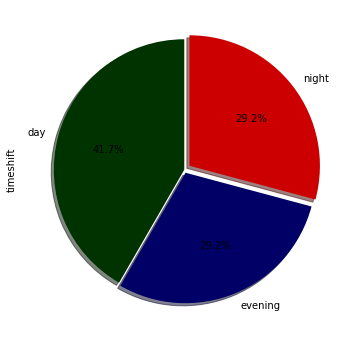

In [ ]:
# Chart - 2 visualization code
df['timeshift'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=["day","evening","night"],
                               colors=['#003300','#000066',"#cc0000"],
                               explode=[0,0.025,0.05]);

##### 1. Why did you pick the specific chart?

**A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.**

##### 2. What is/are the insight(s) found from the chart?

**From the above Pie chart we can see that the most demand of tental bikes is during the day shift with total of 41.7% and then followed by evening and night shift both with the same percentage of 29.2%.**
**Therefore we can say that the demand of the bike is more during the day time as compared to other shifts of the day.**

### **Chart - 3 - Line Chart on Average Bikes Rented per Hour (Bivariate)**

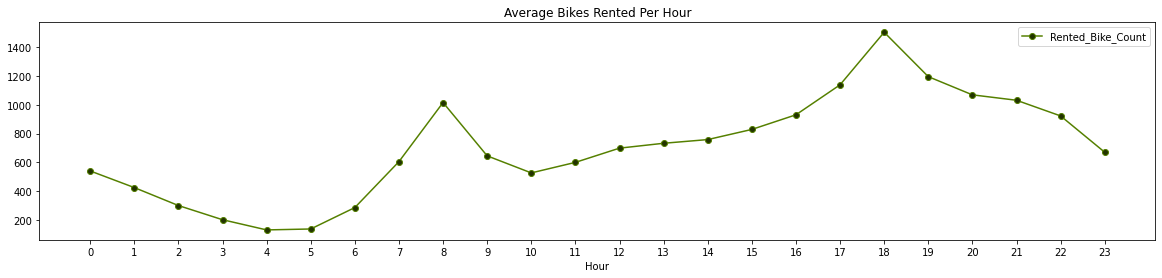

In [ ]:
# Chart - 3 visualization code
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',color = "#558000",markerfacecolor="#223300",title="Average Bikes Rented Per Hour")
a.set_xticks(range(len(avg_rent_hrs)))
a.set_xticklabels(avg_rent_hrs.index.tolist());

##### 1. Why did you pick the specific chart?

**Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.A line graph connects individual data points that, typically, display quantitative values over a specified time interval.**
**Therefore to show the rented bike demand over a period of time for 24 hrs Lime graph was most suitable and hence used.**

##### 2. What is/are the insight(s) found from the chart?

**Rise in demand of Rented Bikes is from 8:00 a.m to 10:00 p.m means people prefer rented bike during rush hour.**
**we can clearly see that demand rises the most at 8 a.m and 6:00 p.m i.e during the Working hours. So we can say that during office opening and closing time there is much high demand of rental bikes.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**From the above graph we have the insight that the rented bike demand is during the peak hours of the day during which the people goes on to their work i.e during working hours which is 8AM to 10PM thus during this time the demand will be the highest and we have to make sure that bikes should be available during this time of the day.**

**Also if the advertisement of the rented bike is to be done it should be done during this timespan so as more and more people will find this useful to go to work and it will eventually create a positive business impact.**

### **Chart - 4  Count of Rented bikes according to Seasons (Bivariate)**

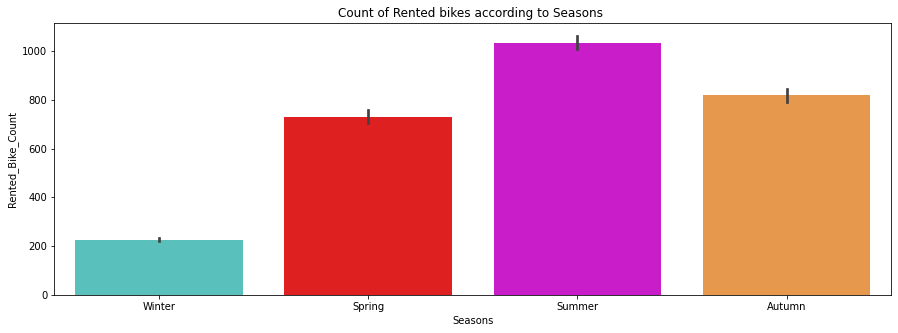

In [ ]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(15,5))
color =["#48D1CC","#ff0000","#e600e6","#ff9933"]
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,palette=color)
ax.set(title='Count of Rented bikes according to Seasons ');


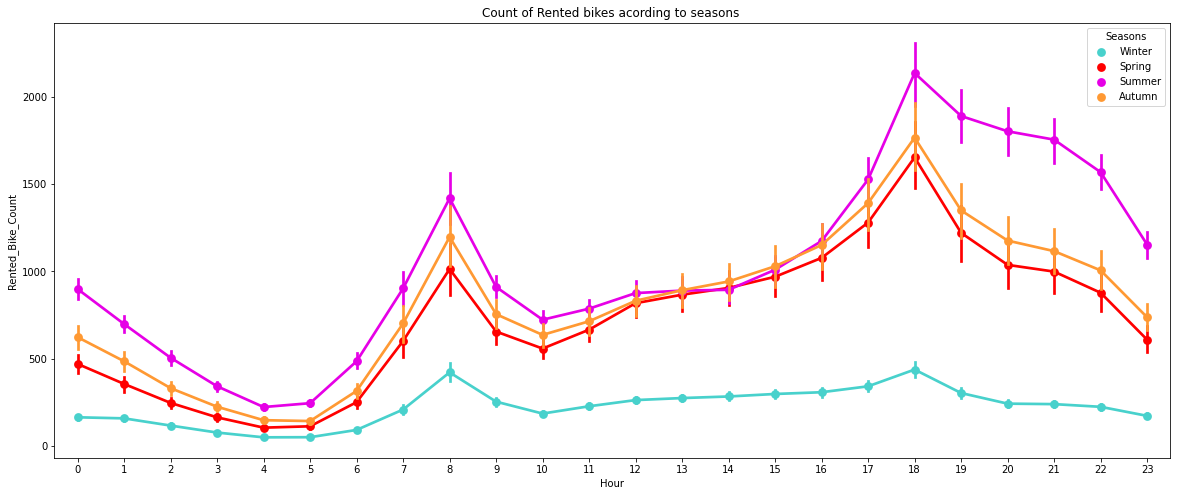

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
color =["#48D1CC","#ff0000","#e600e6","#ff9933"]
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax, palette=color)
ax.set(title='Count of Rented bikes acording to seasons ');

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

**Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.A line graph connects individual data points that, typically, display quantitative values over a specified time interval.**

##### 2. What is/are the insight(s) found from the chart?

**The above bar plot and point plotshows the use of rented bike during the four different seasons throughout the day, and it can be clearly seen that,**
**In summer season the use of rented bike is high and peak time is 7am to 9am and 5pm to 7pm.**

**Followed by the Autumn Season and Spring Season, and the peak hours are same i.e 7am to 9am and 5pm to 7pm.**

**In winter season the use of rented bike is very very low because of snowfall.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, we have this insight helps us to create a positive business impact as we can see that during the summer season the demand of the rented bike is the highest and more and more people prefer to rent a bike during this season.** 

**But it will also create a negative impact as we can see that the rented bike demand abruptly decreases during the winter season which will also say that during this season there will be least demand hence, the bikes available considering the demand of summer season will not be in use hence the business may suffer downfall during the whole winter season due to the snowfall.**

### **Chart - 5 Count of Rented bikes according to Month (Bivariate)**

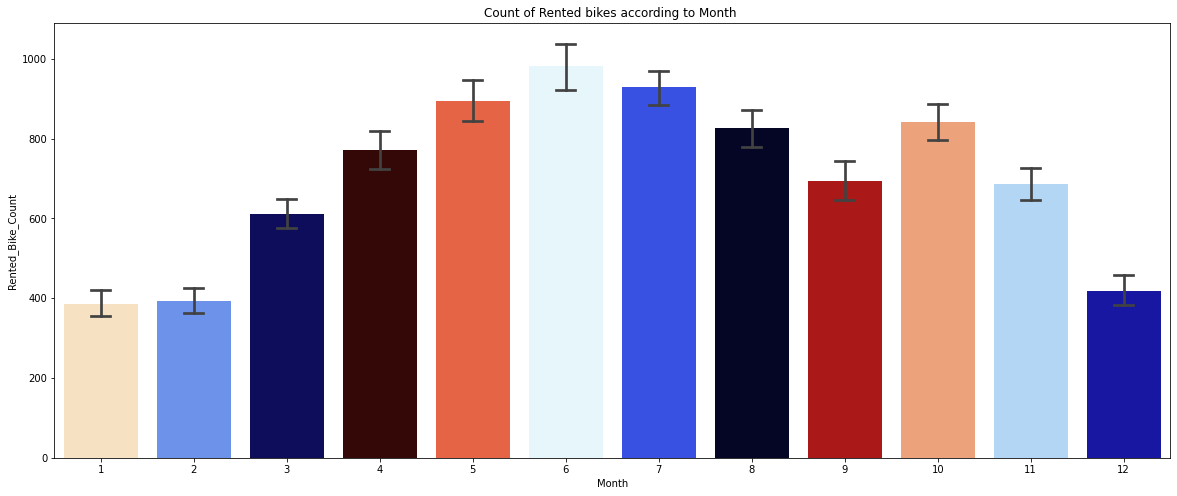

In [ ]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data= df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2, palette="flag")
ax.set(title='Count of Rented bikes according to Month ');

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

##### 2. What is/are the insight(s) found from the chart?

**From this bar plot we can clearly see that the Demand of the rental bike is maximum during 4th Month to 10th Month i.e April to October which comes under Spring, Summer and Autumn and least in 12th, 1st and 2nd i.e December, January and February.**

### **Chart - 6 Count of Rented bikes according to Functioning Day (Bivariate)**

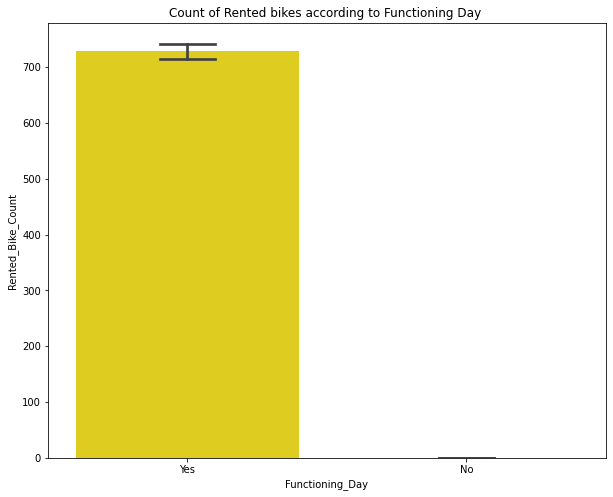

In [ ]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2, palette ="jet_r" )
ax.set(title='Count of Rented bikes according to Functioning Day ');

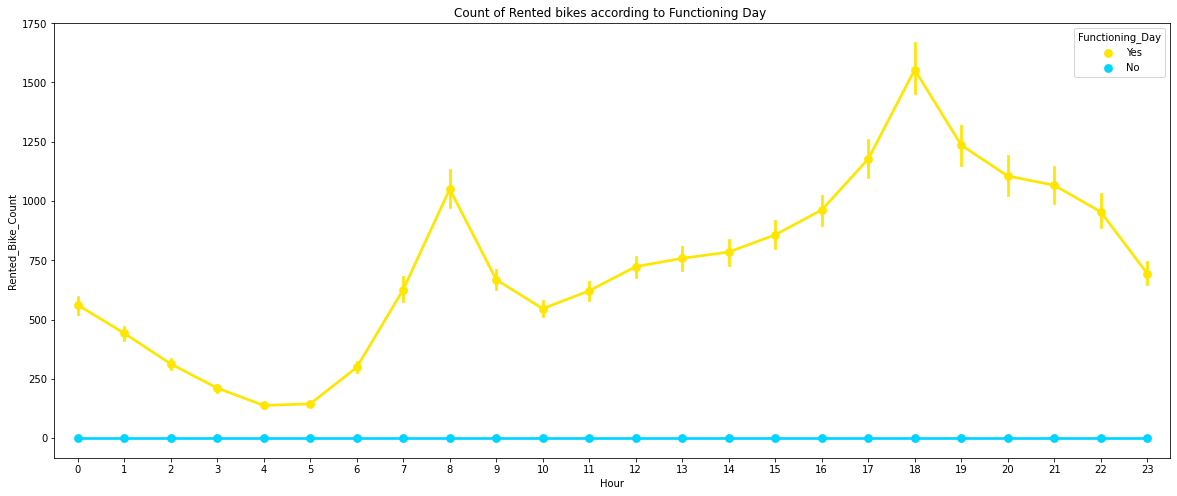

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax,palette ="jet_r")
ax.set(title='Count of Rented bikes according to Functioning Day ');

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

**Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.A line graph connects individual data points that, typically, display quantitative values over a specified time interval.**

##### 2. What is/are the insight(s) found from the chart?

**The above Bar Plot and Line Plot are used to show the Demand of rental bikes during Functioning and Non Functioning day and it clearly shows the people dont use rental bikes at during during Functioning day.**

### **Chart - 7 Count of Rented bikes according to Holiday (Bivariate)**

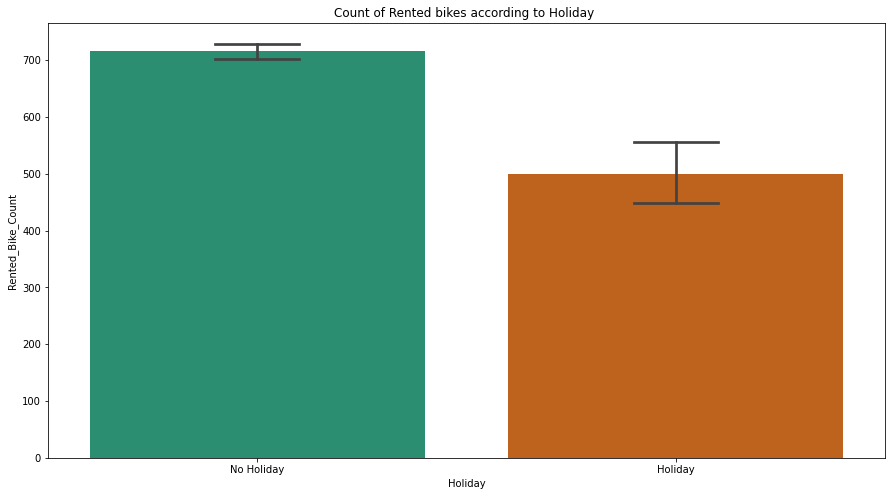

In [ ]:
# Chart - 7 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2, palette = "Dark2")
ax.set(title='Count of Rented bikes according to Holiday ');

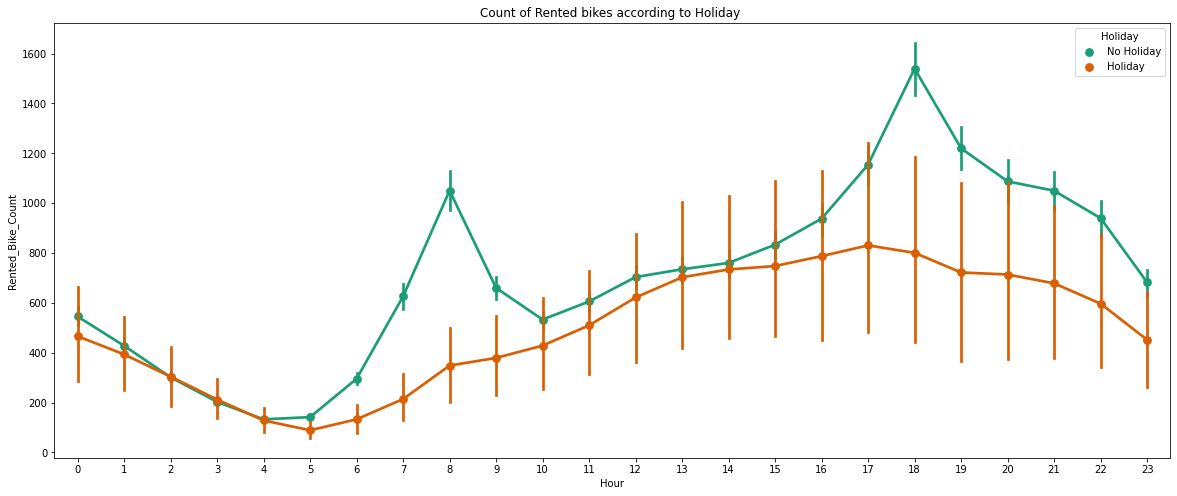

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax, palette = "Dark2")
ax.set(title='Count of Rented bikes according to Holiday ');

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

**Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.A line graph connects individual data points that, typically, display quantitative values over a specified time interval.**

##### 2. What is/are the insight(s) found from the chart?

**From the Graphs above we can see that the demand of rental bikes is more on non-holiday day and the peak hours are 7am-10am and 5pm-7pm.**

**The demand on holiday day is more between 1pm-7pm.**

## **Analysis of Numerical variables**

What are Numerical variables?

### **Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.**

## **Chart - 8 Analysis of Numerical Variable**

As we know that in our data numerical datatype are of two types i.e integer and float. Thus we will collect the columns having this datatype in a single list.

In [ ]:
# Chart - 8 visualization code
numericvar_columns=list(df.select_dtypes(['int64','float64']).columns)
numericvar_features=pd.Index(numericvar_columns)
numericvar_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

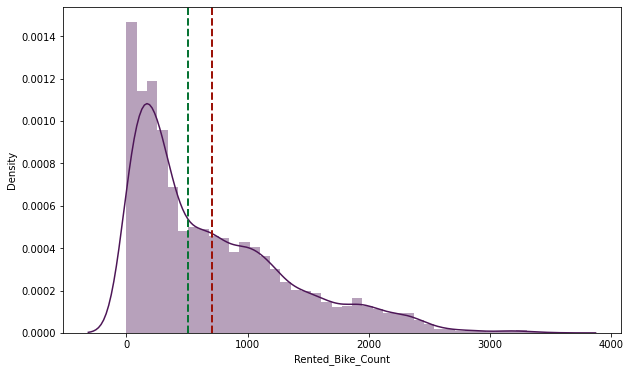

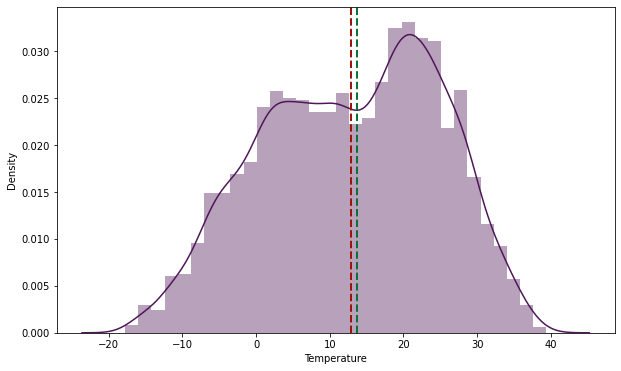

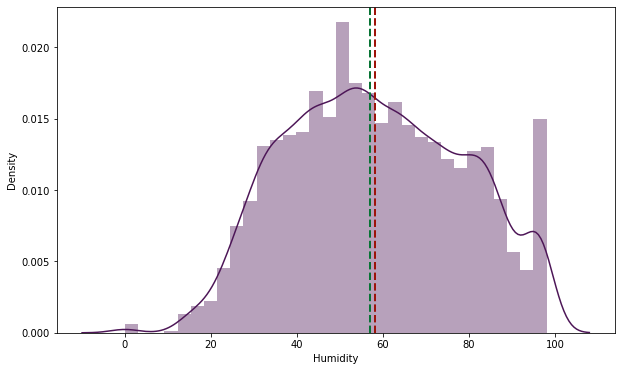

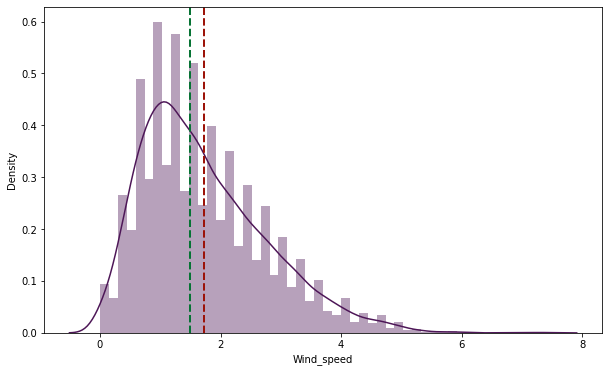

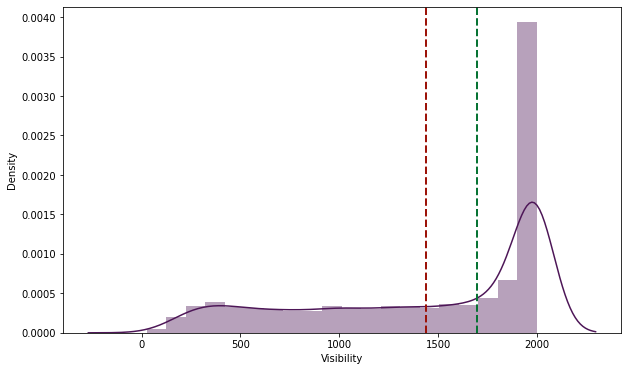

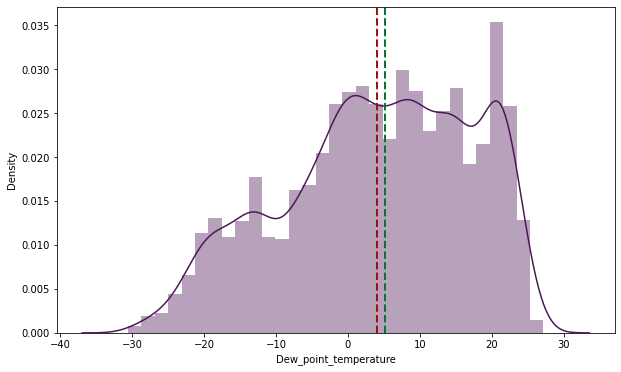

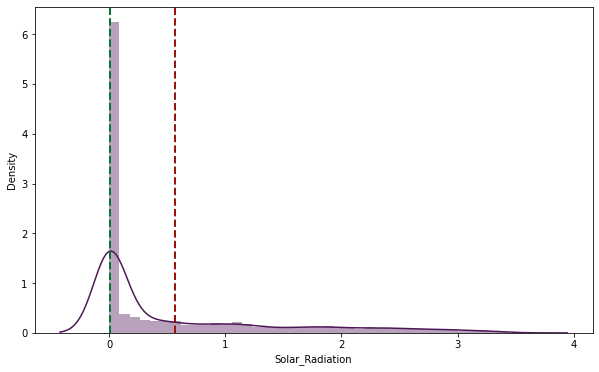

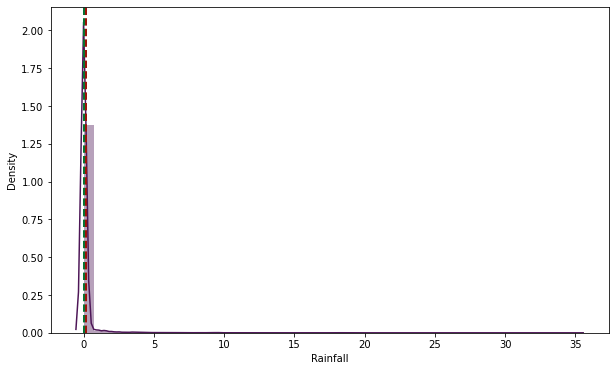

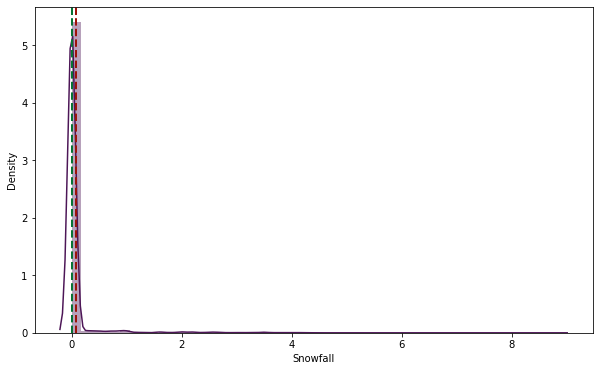

In [ ]:
#printing displots to analyze the distribution of all numerical variables
for col in numericvar_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col], color= "#4d1657")
  plt.xlabel(col)
  plt.axvline(df[col].mean(), color='#9c1309', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='#077334', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

### **A Distplot or distribution plot, depicts the variation in the data distribution.**
### **Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution.**


##### 2. What is/are the insight(s) found from the chart?

### **From the distribution plot above we can see all the numerical features such as Rented_Bike_Count, Temperature, Humidity, Wind_speed, Visibility, Dew_point_temperature,Solar_Radiation,Rainfall and Snowfall with their density.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **Just a histogram and box plot cannot define business impact. It is done just to see the distribution of the column data over dataset.**

### **Chart - 9 Numerical Variables (independent) vs Rented bike count (dependent)**

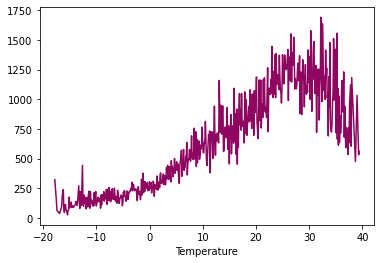

In [ ]:
# Chart - 9 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot(color = "#8f0661");

**From the above graph plot of Temperature vs Rented bike count we can see that the most of the bikes are in demand during the temperature between 20°C to 30°C. And as the temperature decreases the bike demand count also decreases significantly.**

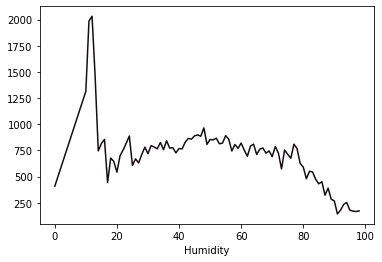

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Humidity" 
df.groupby('Humidity').mean()['Rented_Bike_Count'].plot(color = "#140c12");

**From the above graph plot we can see that when the humidity is low the demand for the bike is high and as the humidity increases the demand decreases.**

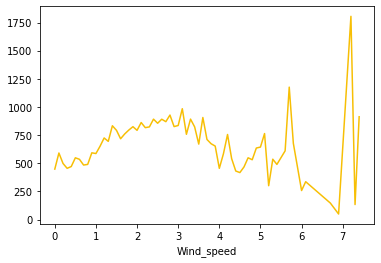

In [ ]:
# #print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot(color = "#f7bf05");

**We can see from the above graph plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.**

In [ ]:
# #print the plot to analyze the relationship between "Rented_Bike_Count" and "Visibility" 
# df.groupby('Visibility').mean()['Rented_Bike_Count'].plot(color = "#24756d");

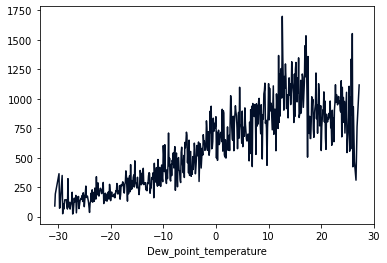

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot(color = "#020f29");

**From the above graph plot of Dew point temperature vs Rented bike count we can see that this graph is almost identical to temperature vs rented bike count graph.**

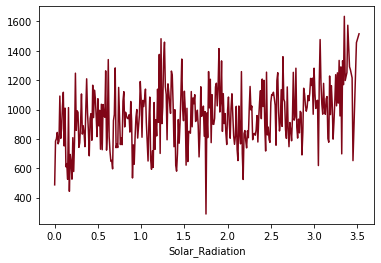

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot(color = "#800617");

**From the above graph plot of Solar Radiation vs Rented bike count we can see that Demand is high when the solar radiation is present. There most people like to rent bike when there is good amount of solar radiation. General count of bike rented when the solar radiation is present is above 1000.**

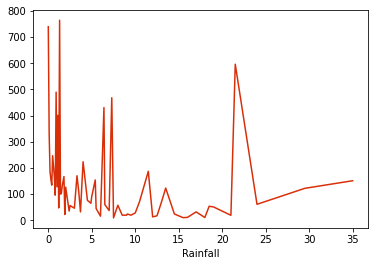

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot(color = "#d92f09");

**From this graph plot of Rainfall vs Rental bike count we can see that most of te bikes are rented when there is no rain but even if the rain is increasing the demand of the rental bike is not declining completely.**

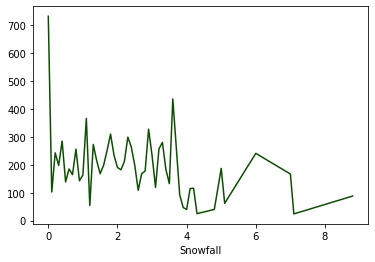

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot(color = "#0c4d02");

**From the above graph of Snowfall vs Rented bike count we can see that the demand is highest when there is no snow but upto 4cm there is still some demand in rental bikes but as the snow crosses 4cm the demand decreases completely.**

##### 1. Why did you pick the specific chart?

### **Line graphs can be used to show how something changes over time. Line graphs are good for plotting data that has peaks (ups) and valleys (downs), or that was collected in a short time period.**
### **A line graph is commonly used to display change over time as a series of data points connected by straight line segments on two axes. The line graph therefore helps to determine the relationship between two sets of values, with one data set always being dependent on the other set.**


##### 2. What is/are the insight(s) found from the chart?

### **From the above line graph we can see the Numerical Variable such as Temperature, Humidity, Dew point temperature, Rainfall, snowfall, solar radiation, visibility etc with respect to the Rented bike count.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **It shows the Rise and Fall in the respective numerical variables with respect to the Rented bike count.**

## **Chart - 10  Regression Plot**

What is the use of regression plot?

### **The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

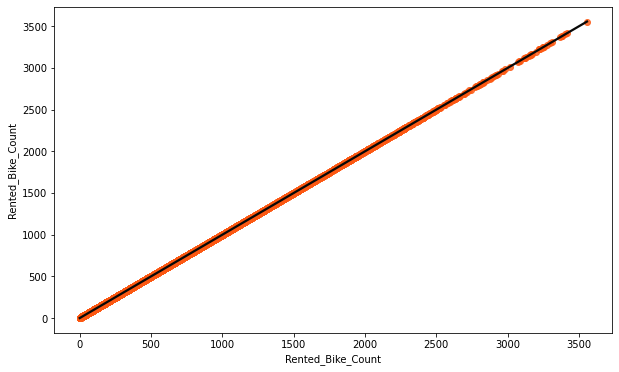

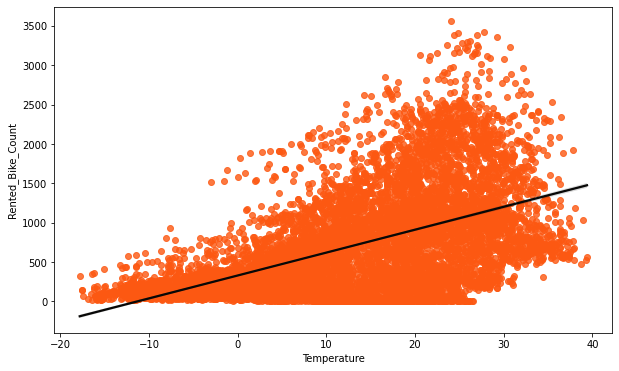

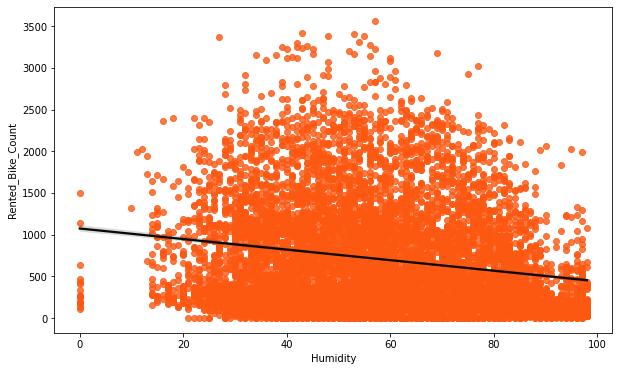

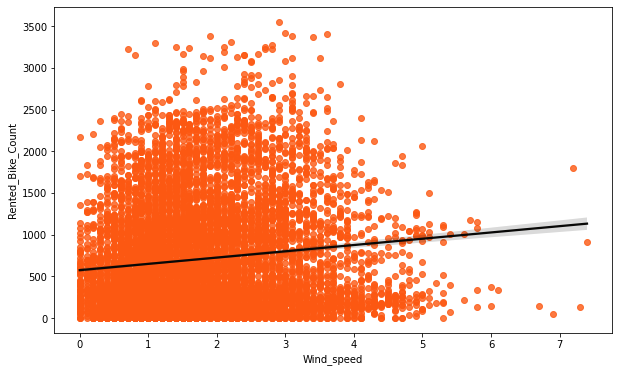

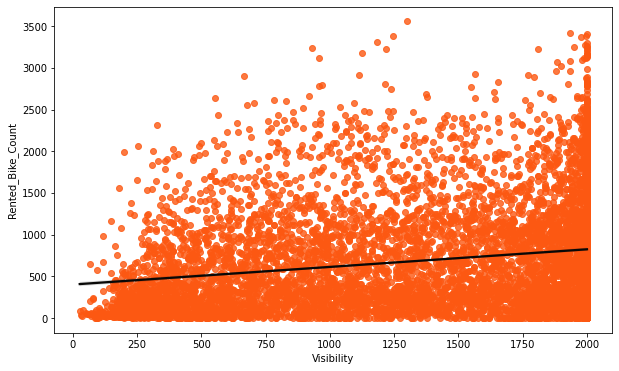

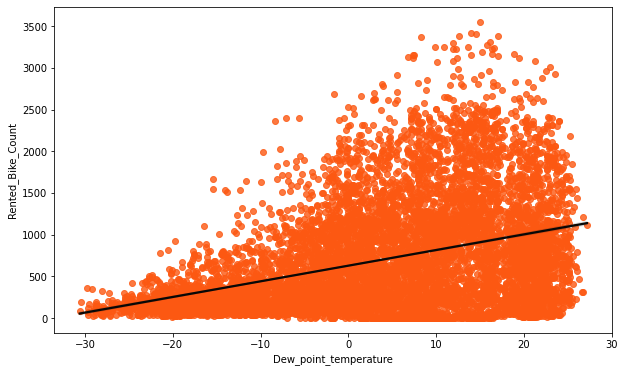

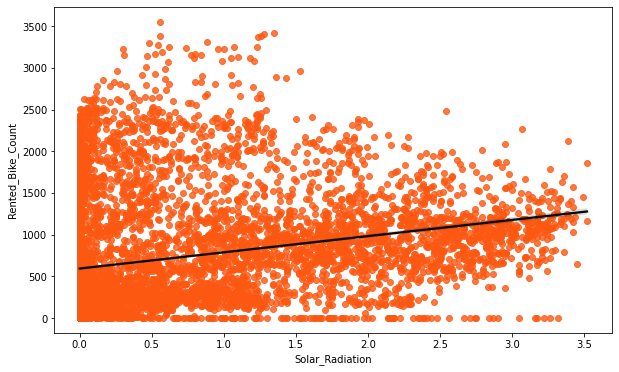

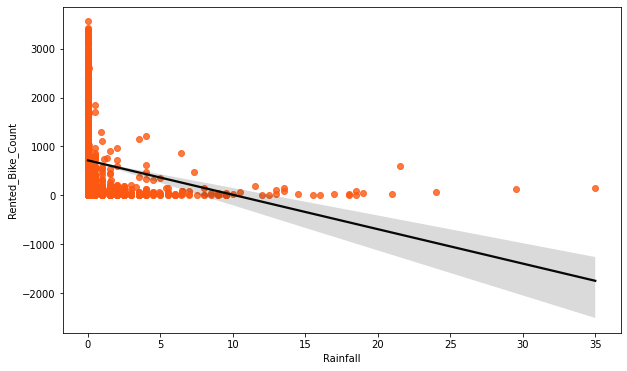

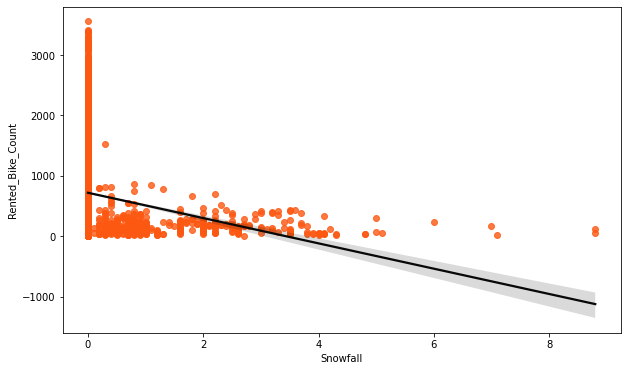

In [ ]:
# Chart - 10 visualization code
#printing the regression plot for all the numerical features
for col in numericvar_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": '#fc5812'}, line_kws={"color": "#080807"})

##### 1. Why did you pick the specific chart?

### **Regression analysis is a reliable method of identifying which variables have impact on a topic of interest. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other.**

##### 2. What is/are the insight(s) found from the chart?

### **From the above regression plot of all numerical variables we can see that the independent variables 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positive in relation to the target variable which means that the Rented bike count increases with the increase in all of these features.**

### **'Rainfall','Snowfall'and 'Humidity' these independent variables are negative in relation with the target variable which means that the Rented bike count decreases with the increase in these features.**

## **Chart - 14 - Correlation Heatmap**

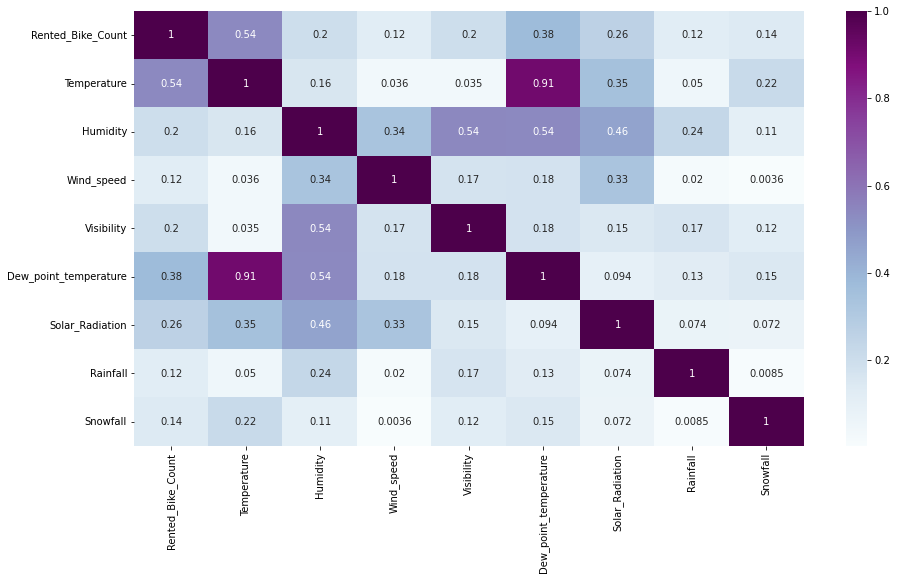

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap="BuPu");


##### 1. Why did you pick the specific chart?

### **Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.**

##### 2. What is/are the insight(s) found from the chart?

### **Temperature and Dew point Temperature are highly correlated.**
### **As per our regression assumption, there should not be colinearity between independent variables.**
### **We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.**
### **And also we dropping "Date" column as its not useful for us(as we have created the month, weekdays and weekend columns.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
week                     0
timeshift                0
dtype: int64


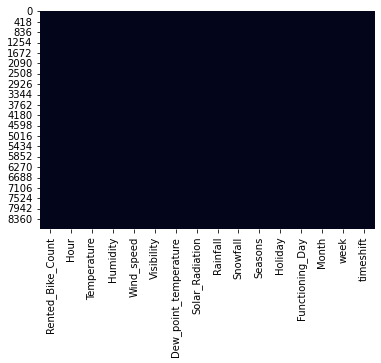

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df = df.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

### There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [ ]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 numerical variables


In [ ]:
# Finding the discrete values from the columns.
discrete = []
for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

Month  values:  [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
week  values:  [0, 1]
Categories (2, int64): [0, 1]
There are 2 discrete variables


In [ ]:
continuous = [var for var in numerical if var not in discrete and var not in ['Rented_Bike_Count']]

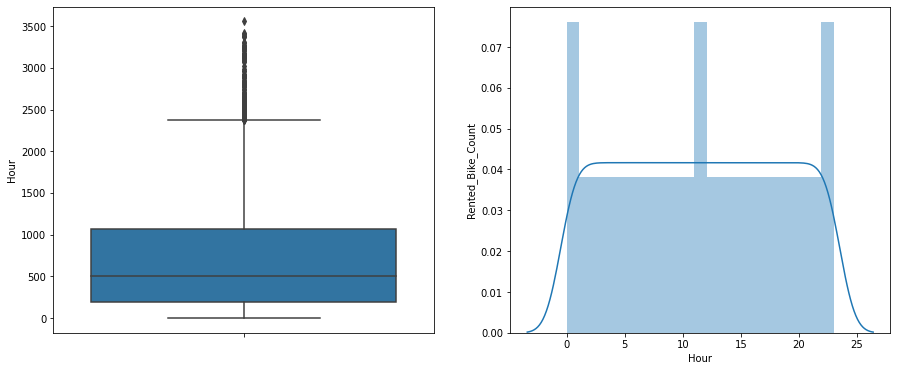

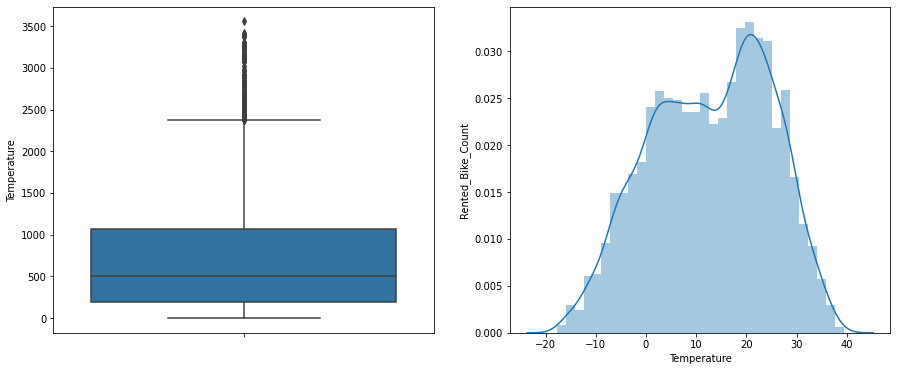

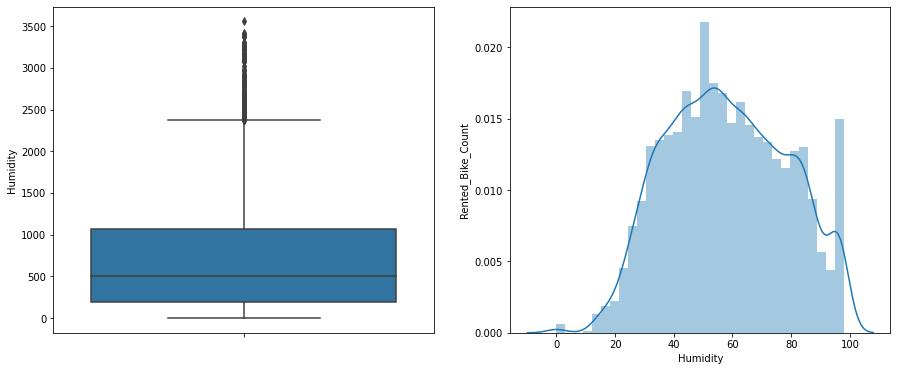

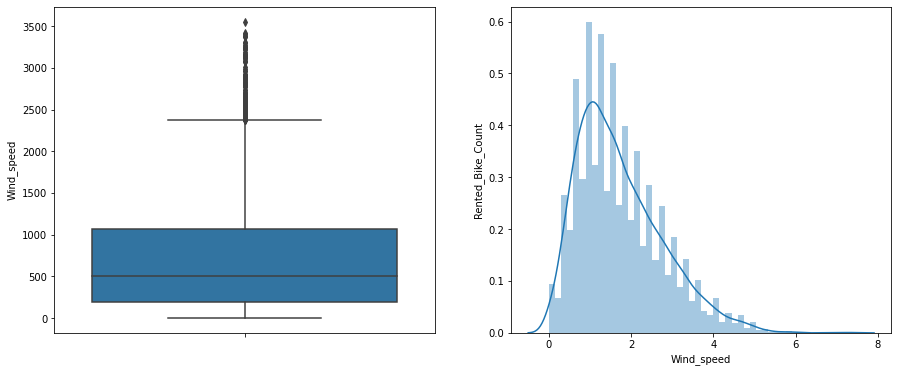

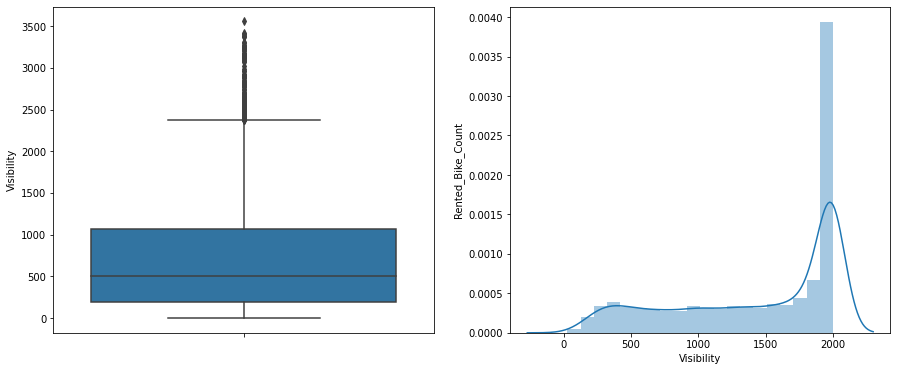

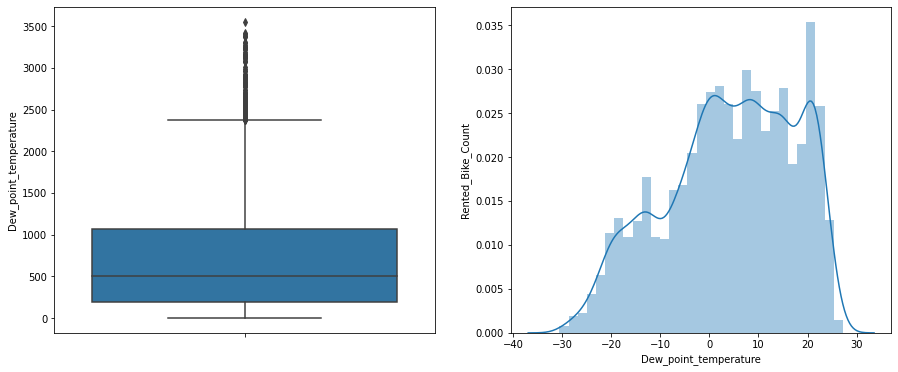

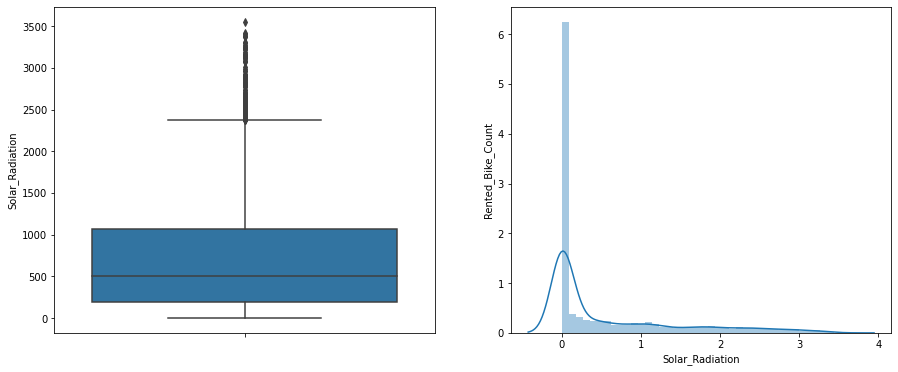

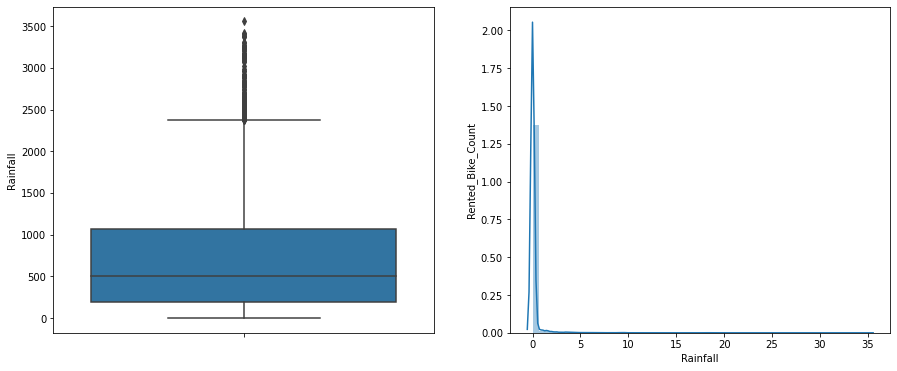

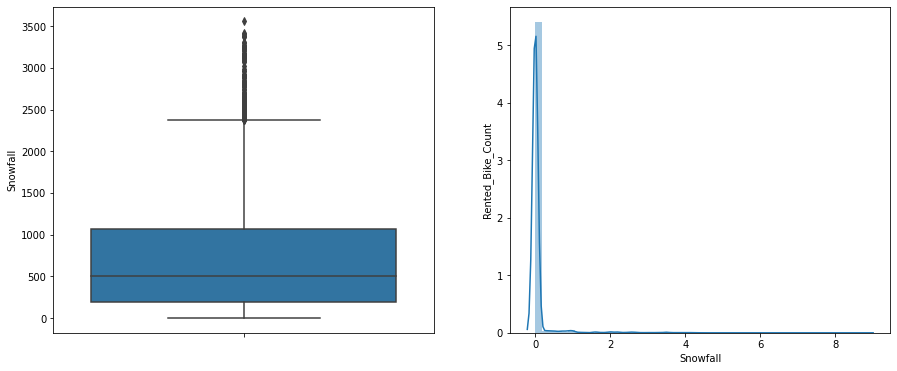

In [ ]:
# Checking whether the variables have outliers present or not.
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y = df["Rented_Bike_Count"])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel("Rented_Bike_Count")
    fig.set_xlabel(var)

    plt.show()

**Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we should tackle these to improve the model performance.**

In [ ]:
# finding the inter-quartile range 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented_Bike_Count         874.25
Temperature                19.00
Humidity                   32.00
Wind_speed                  1.40
Visibility               1060.00
Dew_point_temperature      19.50
Solar_Radiation             0.93
Rainfall                    0.00
Snowfall                    0.00
dtype: float64


In [ ]:
# listing features to remove outliers

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning_Day','Month','year','week']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'timeshift']

In [ ]:
# removing outliers

'left == right'
df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            7078 non-null   float64 
 3   Humidity               7078 non-null   float64 
 4   Wind_speed             7078 non-null   float64 
 5   Visibility             7078 non-null   float64 
 6   Dew_point_temperature  7078 non-null   float64 
 7   Solar_Radiation        7078 non-null   float64 
 8   Rainfall               7078 non-null   float64 
 9   Snowfall               7078 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  week                   8760 non-null   c

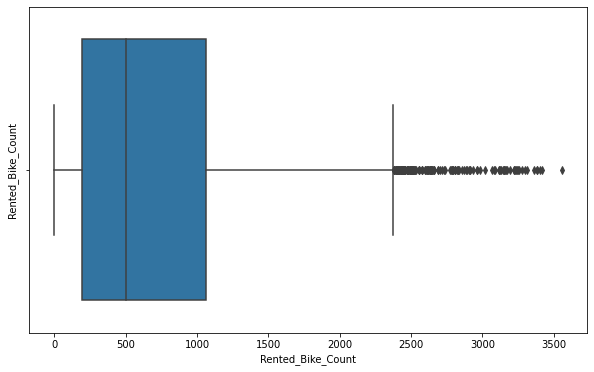

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

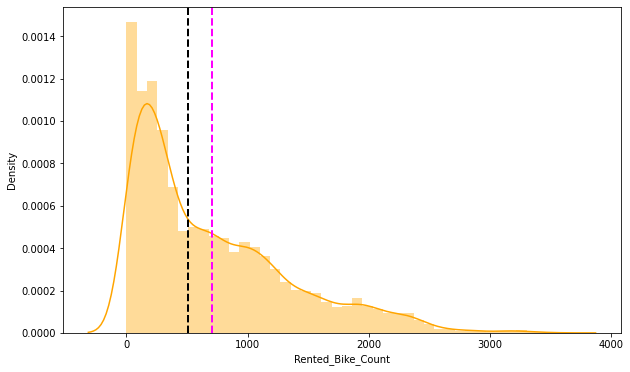

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="orange")
ax.axvline(df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

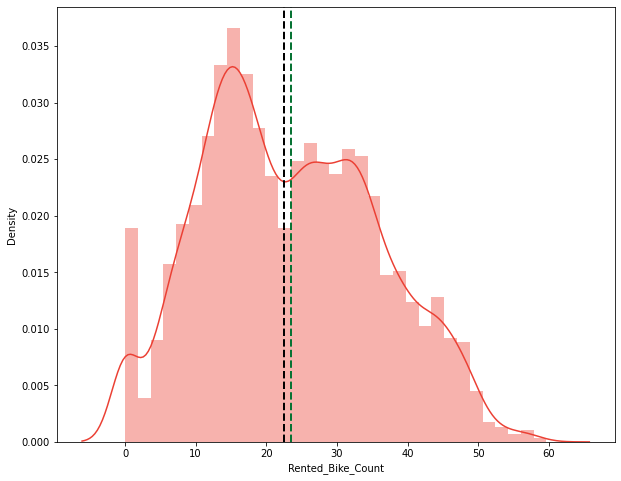

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="#eb4034")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='#077334', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

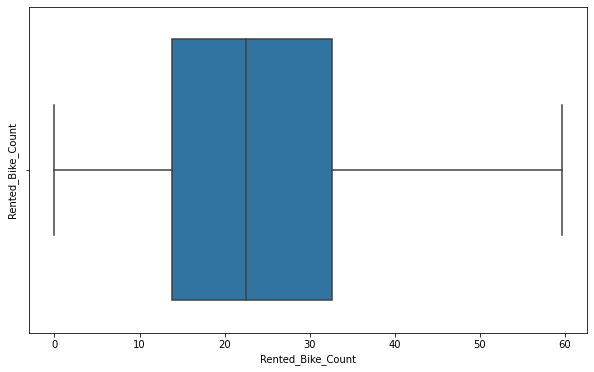

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**we have used box plot method to check the outliers present in the dataset.**

**The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median.**

**we have used IQR method for transformation of the outliers.**

**The IQR is the first quartile subtracted from the third quartile Formulae :**
**IQR = Q3 − Q1**
**Where, Q3 is 75th percentile & Q1 is 25th percentile**

**The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile.The common value for the factor k is the value 1.5**

**We have then used Squareroot transformation to remove the skewness present in the rented bike column as the column was moderately skewed.**

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Lets take care of the categorical features
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'week', 'timeshift']

In [ ]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(df[col].value_counts(),'\n')

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64 

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning_Day, dtype: int64 

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64 

0    6216
1    2544
Name: week, dtype: int64 

day        2565
evening    2278
night      2235
Name: timeshift, dtype: int64 



In [ ]:
# Encode your categorical columns

encoder = {'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning_Day':{'Yes':1, 'No': 0},
          'timeshift': {'night':0, 'day':1, 'evening':2}}

In [ ]:
# Label Encoding
df = df.replace(encoder)
# One Hot Encoding
df = pd.get_dummies(df, columns=["Seasons","Hour"], prefix='', prefix_sep='')

In [ ]:
# New look
df.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,...,14,15,16,17,18,19,20,21,22,23
0,254,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

**For the columns 'seasons' and 'Hour' we have used one hot encoding.In one-hot encoding, categorical data are represented as vectors of zeros and ones. This is done by using a separate dummy variable for each category, and setting the value of the dummy variable to 1 if the observation belongs to that category and 0 otherwise.**

**For the other variable columns such as 'Holiday','Functioning day' and 'timeshift' we have used label encoding.Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.**

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
def split(df,target_feature):
  x=df.drop(target_feature, axis=1)
  y=df[target_feature]
  x_train,x_test,y_train,y_test= train_test_split(x,y)
  return x,y,x_train,x_test,y_train,y_test


# x,y,x_train,x_test,y_train,y_test=split(df, target_feature)

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
df = df.dropna()

In [ ]:
df=df.drop(['Rainfall','Snowfall'],axis=1)

In [ ]:
# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['Rented_Bike_Count']]
calc_vif(df[independent_variables])

,variables,VIF
0,Temperature,91.035475
1,Humidity,17.966267
2,Wind_speed,1.408613
3,Visibility,1.573239
4,Dew_point_temperature,119.924899
5,Solar_Radiation,4.274525
6,Holiday,1.032790
7,Functioning_Day,1.088239
8,Month,1.302909
9,week,1.007393


In [ ]:
# Since Summer and Winter are highly correlated with temperature. hence we will remove them.
independent_variables = [i for i in df.columns if i not in ['Rented_Bike_Count','Winter','Summer','Dew_point_temperature','Hour','Humidity']]
calc_vif(df[independent_variables])

,variables,VIF
0,Temperature,1.232504
1,Wind_speed,1.404650
2,Visibility,1.125051
3,Solar_Radiation,3.728569
4,Holiday,1.014753
5,Functioning_Day,1.082954
6,Month,1.212185
7,week,1.005044
8,timeshift,inf
9,Autumn,1.373836


##### What all feature selection methods have you used  and why?

**Here we have used Variance Inflation Factor.**

**Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.**

**Steps for Implementing VIF**

**• Calculate the VIF factors.**

**• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.**

**In VIF method, we pick each feature and regress it against all of the other features.For each regression, the factor is calculated as :**

**VIF=\frac{1}{1-R^2}**

**Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.**

### 6. Data Splitting

In [ ]:
#Assign the value in X and Y
X = df.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df['Rented_Bike_Count'])

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)


(5308, 39)
(1770, 39)


What data splitting ratio have you used and why?

**There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.**

**If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 75:25 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).**

**You'd be surprised to find out that 75/25 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.**

**In this case the training dataset is small, that's why I have taken 75:25 ratio.**

### 8. Data Scaling

In [ ]:
# Scaling your data
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
df.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Holiday',
       'Functioning_Day', 'timeshift', 'Autumn', 'Spring', 'Summer', 'Winter',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')

### Which method have you used to scale you data and why?

**In this we have used MinMaxScaler method of scaling the data.**
**MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.**
**MinMaxScaler preserves the shape of the original distribution.It doesn’t meaningfully change the information embedded in the original data.**
**Note that MinMaxScaler doesn’t reduce the importance of outliers.**
**The default range for the feature returned by MinMaxScaler is 0 to 1.**

## ***7. ML Model Implementation***

# **ML Model - 1 Linear Regression**

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

0.7902084941609386

In [ ]:
#check the coefficeint
reg.coef_

array([ 1.69105357e+01, -1.02411788e+01, -5.06363690e-01, -2.63785429e-01,
        5.42111275e+00,  4.02200959e+00, -3.01867204e+00,  2.92979358e+01,
        8.76972188e-01, -1.22403320e+00, -4.13459938e+12,  8.92223018e+12,
        8.92223018e+12,  8.92223018e+12,  8.92223018e+12, -3.36107964e+12,
       -3.36107964e+12, -3.36107964e+12, -3.36107964e+12, -3.36107964e+12,
       -3.36107964e+12, -3.36107964e+12, -1.29377996e+12, -1.29377996e+12,
       -1.29377996e+12, -1.29377996e+12, -1.29377996e+12, -1.29377996e+12,
       -1.29377996e+12, -1.29377996e+12, -1.29377996e+12, -1.29377996e+12,
        7.73519734e+11,  7.73519734e+11,  7.73519734e+11,  7.73519734e+11,
        7.73519734e+11,  7.73519734e+11,  7.73519734e+11])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 32.376287645559145
RMSE : 5.690016489041059
MAE : 4.382259154299593
R2 : 0.7902084941609386
Adjusted R2 : 0.7854790902720812


**Looks like our R2 score value is 0.79 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 31.820674120249066
RMSE : 5.640981662818012
MAE : 4.322945386062083
R2 : 0.7924115394095299
Adjusted R2 : 0.7877317995465077


**The r2_score for the test set is 0.792. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

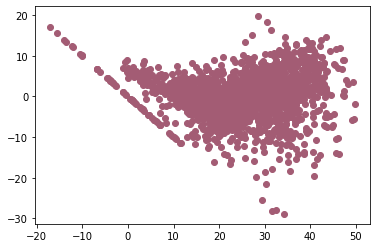

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test), color = "#a35c74")

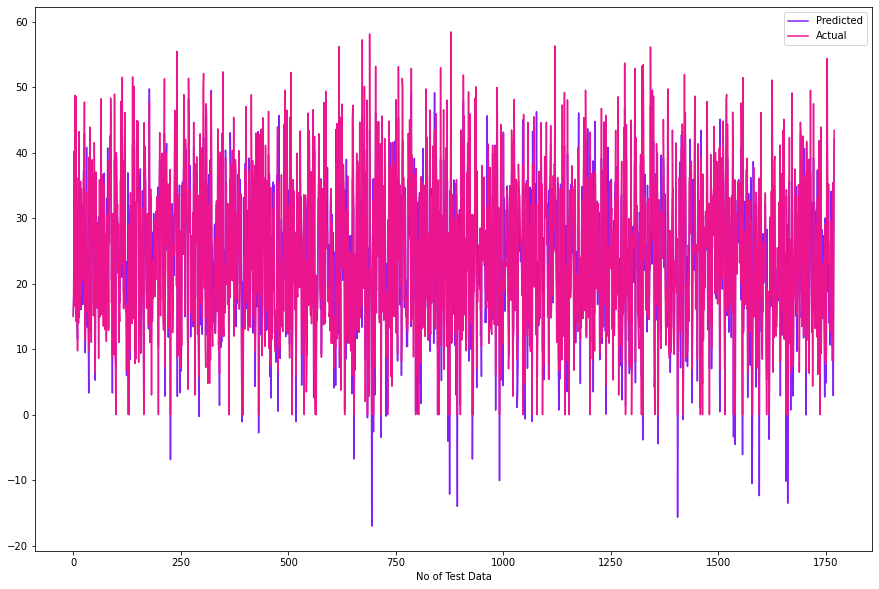

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test,color = "#8120f7")
plt.plot(np.array(y_test), color = "#eb158e")
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Ridge Regression

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.790207411993825

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.37645465210027
RMSE : 5.690031164422588
MAE : 4.382497819444945
R2 : 0.790207411993825
Adjusted R2 : 0.7854779837092928


**Looks like our r2 score value is 0.79 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 31.816618470507567
RMSE : 5.640622170515196
MAE : 4.322980336014537
R2 : 0.7924379972426779
Adjusted R2 : 0.7877588538279174


**The r2_score for the test set is 0.79. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

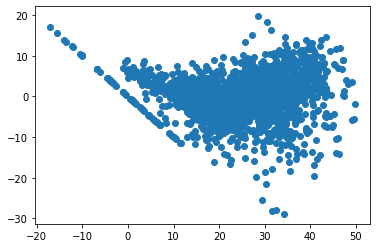

In [ ]:
# Visualizing evaluation Metric Score chart
# Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

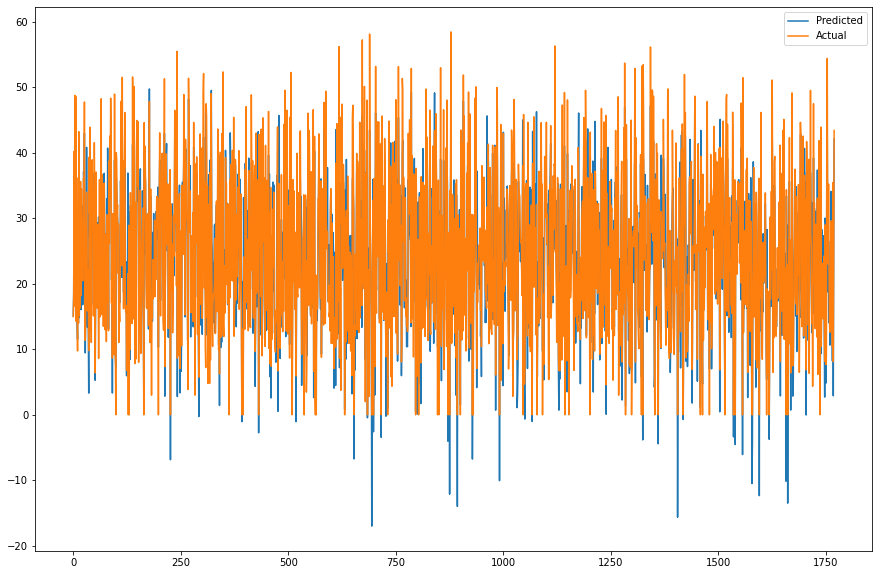

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Lasso Regression

In [ ]:
# ML Model - 3 Implementation
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))


0.38862535793008 0.39091130940379626


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 93.99823205200505
RMSE : 9.695268539447737
MAE : 7.5040053251096515
R2 : 0.39091130940379626
Adjusted R2 : 0.3771804082863096


**Looks like our r2 score value is 0.39 that means our model is not able to 
capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 93.71596665515206
RMSE : 9.680700731618144
MAE : 7.435113807518681
R2 : 0.38862535793008
Adjusted R2 : 0.3748429238024923


**The r2_score for the test set is 0.38. This means our linear model is  not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

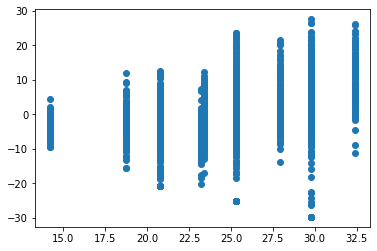

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

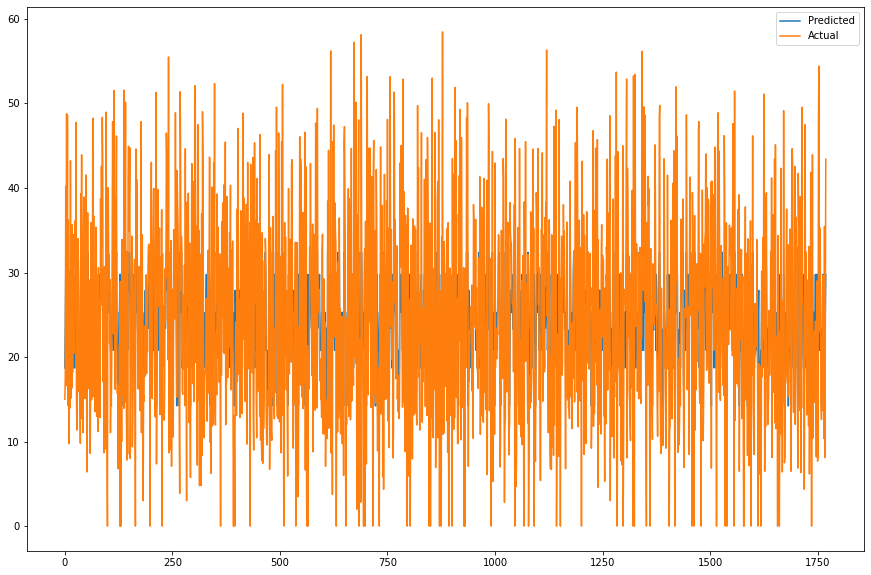

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

# **ML Model - 4  Linear regression with elastic net**




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.6565214803800545

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 53.00767210192563
RMSE : 7.280636792336617
MAE : 5.588828122623237
R2 : 0.6565214803800545
Adjusted R2 : 0.6487783230013391


**Looks like our r2 score value is 0.62 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.74148322695177
RMSE : 7.262333180662519
MAE : 5.5059386966519375
R2 : 0.6559305038300892
Adjusted R2 : 0.6481740238586289


**The r2_score for the test set is 0.65. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

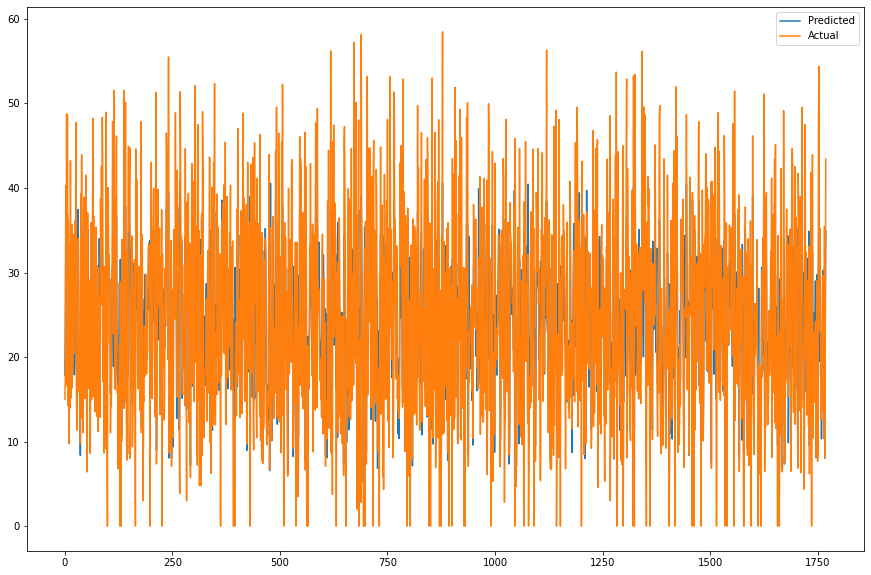

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

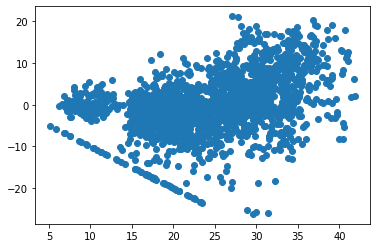

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# **ML Model - 5 Decision Tree**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [541]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [543]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7869530828670673
MSE : 32.878682306550964
RMSE : 5.733993573989333
MAE : 4.180806356590388
R2 : 0.7869530828670673
Adjusted R2 : 0.7821502910935504


**Looks like our r2 score value is 0.69 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [544]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [545]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 42.73148445204623
RMSE : 6.536932342624194
MAE : 4.603735669409471
R2 : 0.7212327104503073
Adjusted R2 : 0.71494836114832


**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [546]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

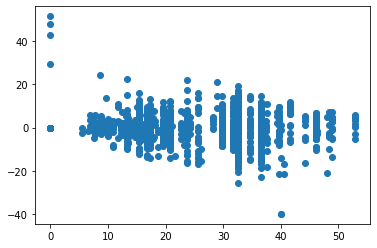

In [547]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

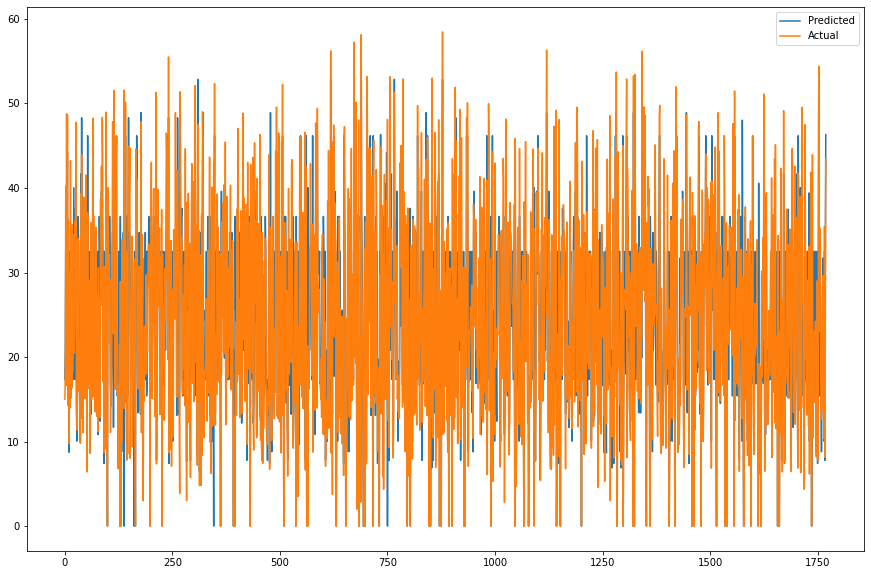

In [548]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **decision tree with gridsearch cv**

In [549]:
# Tunning the hyper parameters with GridSearchCV
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

regressor_gs_cv =GridSearchCV(decision_regressor ,param,scoring='r2',cv=5)
regressor_gs_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]},
             scoring='r2')

In [550]:
#looking at the best estimator
regressor_gs_cv.best_estimator_

DecisionTreeRegressor(max_depth=10, random_state=0)

In [551]:
#checking the score with best parameters
DT_with_cv = regressor_gs_cv.score(X_test,y_test)
DT_with_cv

0.8631727854698349

In [552]:
print(f'The r2 score of decision tree is {r2_score(y_pred_test,y_test)}')

print(f'the r2 score of decision tree with hyper perameteres tunning is {regressor_gs_cv.score(X_test,y_test)} ')


The r2 score of decision tree is 0.832757630680693
the r2 score of decision tree with hyper perameteres tunning is 0.8631727854698349 


# Random ForestRegressor with GridSearchCV 

In [553]:
from sklearn.ensemble import RandomForestRegressor

In [554]:

#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)
#training the model
rf_reg.fit(X_train, y_train)
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score_train= {R2_Score_train}')

MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')
R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score_test= {R2_Score_test}')

MSE= 1.8545654877022935
RMSE= 1.3618243233627065
R2_Score_train= 0.9879828073372215
MSE= 12.895308831643852
RMSE= 3.591003875191985
R2_Score_test= 0.9158749026157121


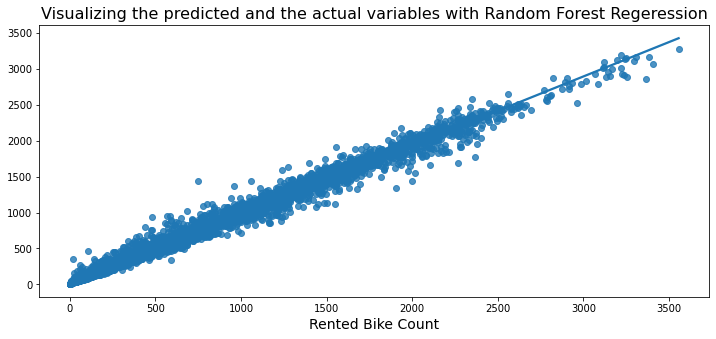

In [555]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train*y_train, pred_train*pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

In [556]:
rf_reg.feature_importances_


array([2.95448935e-01, 3.62057756e-02, 1.06966280e-02, 1.21458750e-02,
       2.07134268e-02, 4.62699490e-02, 3.35290514e-03, 1.89803149e-01,
       1.23266891e-02, 9.91262622e-03, 2.15796050e-01, 7.47555299e-03,
       5.91480654e-03, 1.65156178e-03, 5.61587597e-02, 1.48209338e-02,
       7.90500346e-03, 2.25936529e-03, 1.64200159e-03, 2.65126142e-03,
       2.60819405e-03, 1.79619265e-03, 1.69465149e-03, 1.26936826e-02,
       8.91406761e-04, 1.58546061e-03, 3.29761775e-04, 2.80833420e-04,
       2.23134003e-04, 2.48584512e-04, 7.67060001e-04, 3.47304954e-03,
       1.67200445e-03, 8.02496826e-03, 1.12192107e-03, 2.77210212e-04,
       3.33960233e-04, 6.61462251e-04, 8.16520678e-03])

In [557]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [558]:
features = X_train.columns
importances = rf_reg.feature_importances_
indices = np.argsort(importances)

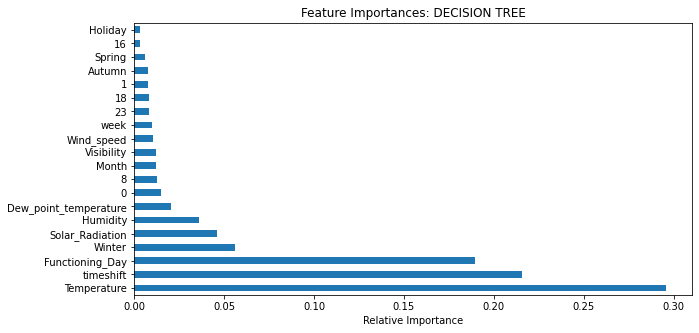

In [559]:
# Feature importances

dt_feat_imp = pd.Series(rf_reg.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')
plt.show()

# **SVR using grid searchcv**

In [560]:
from sklearn.svm import SVR

In [561]:
# selecting the values of SVR
param = {'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

In [562]:
#train the model
modelsvr = SVR(kernel='rbf')
grids = GridSearchCV(modelsvr,param,cv=3)
grids.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale')},))

In [563]:
# predicting for both train and test
y_pred_train3=grids.predict(X_train)
y_pred_test3=grids.predict(X_test)

In [564]:
# finding each of the metrics for training set

print('The MAE of training set = ',mean_absolute_error(y_train, y_pred_train3))
print('The MSE of training set = ',mean_squared_error(y_train, y_pred_train3))
print('The R2_score of training set = ',r2_score(y_train, y_pred_train3))

The MAE of training set =  2.2434482865523955
The MSE of training set =  14.454682502843662
The R2_score of training set =  0.9063367103141904


In [565]:
# finding each metrics for test set
svr = r2_score(y_test, y_pred_test3)
print('The MAE of test set = ',mean_absolute_error(y_test, y_pred_test3))
print('The MSE of test set = ',mean_squared_error(y_test, y_pred_test3))
print('The R2_score of test set = ',r2_score(y_test, y_pred_test3))

The MAE of test set =  2.494086078475497
The MSE of test set =  15.311031744075605
The R2_score of test set =  0.9001154564547108


# Gradient Boosting Regressor with GridSearchCV

In [566]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [567]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
## Importing Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
## Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

fgb_model= gb_grid.fit(X_train,y_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

In [ ]:
gb_grid.best_estimator_

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
r2_score(y_train, y_pred_train_g_g)

In [ ]:
gradient=r2_score(y_test, y_pred_g_g)
gradient

In [ ]:
#visualizing the predictions
sns.scatterplot(x=y_pred_g_g,y=y_test)
plt.title('Predicted vs Actual - gradientBoosting')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# **compaing the model with r2 value**

In [ ]:
models= ['Ridge_model','elasticnet','Decision_Tree_model','Decision_Tree_model_gridcv','random forest','SVR','gradient']
R2_value= [r2_ridge_test,Adjusted_R2_e,DT,DT_with_cv,R2_Score_test,svr,gradient]
compare_models = pd.DataFrame([R2_value],columns=models,index =['r2_value'])
compare_models

# **conclusion**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***